In [4]:
from IPython.display import display
from sympy import *

# 前置知识

理解这份笔记的内容需，读者需要具备基础的python知识并且对函数，微积分和矩阵有一定的基础。

# 辅助函数

由于后面的笔记中， 我们会大量将一个Sympy object和应用某个函数之后，调用某个方法之后， 或是和执行计算之后的结果比较。 为了减少代码的重复，我编写了helper.py帮忙做这事。

In [5]:
from helper import comparator_factory

func_comparator = comparator_factory('应用函数{}前：','使用后:')

```comparator_factory```返回的comparator是一个函数, 他否则使用的语法是```comparator(target, func, *args, *kwargs)```。 ```target```是待处理的Sympy对象, ```func```是希望应用的Sympy函数,```args```,```kwargs```是传给```func```的额外位置参数和关键字参数。 

In [6]:
from helper import comparator_method_factory
method_comparator = comparator_method_factory('Before calling {}：','After:')

```comparator_method_factory```返回的使用的语法是```comparator(target, method_name, *args, *kwargs)```。 ```target```是待处理的Sympy对象, ```method_name```是希望调用的方法的名字,```args```,```kwargs```是传给调用方法的额外位置参数和关键字参数。 

In [7]:
from helper import comparator_eval_factory

eval_comparator = comparator_eval_factory('计算前：','计算后')

```comparator_eval_factory```返回的```comparator```使用的语法是```comparator(uneval)```。 ```uneval```是未执行计算的Sympy object。

# 符号计算是什么？
Sympy能以符号形式进行数学计算。数学表达式中未经计算的变量可以以符号的形式存在。我们看下面的例子。首先，我们用python的内置函数计算开方，我们可能会这么做。

In [8]:
from math import sqrt

sqrt(8)

2.8284271247461903

这个结果并不能精确的表达$\sqrt{8}$而且我们也很难从这一大串float数值推出原来的表达式是什么。这就是为什么我们需要符号计算。在像Sympy这样的符号计算系统中,不能准确表达的开发运算会保留未经计算的符号形态。

In [9]:
from sympy import sqrt

sqrt(8)

2*sqrt(2)

# 更好的显示效果

上面的例子中，结果很棒。但是在Jupyter中的显示效果看起来并不怎么样。如果我们要更好的显示效果，可以调用```sympy.init_printing()```方法

In [10]:
from sympy import init_printing
init_printing()

In [11]:
sqrt(8)

看上去棒极了!!

# 对变量进行符号计算

Sympy能够对包含符号变量的表达式进行计算。下面是个例子。

In [12]:
from sympy import symbols
x, y = symbols('x y')

expr = x + 2*y

expr

Sympy能自动应用一些明显的化简。 所以下面的例子里，我们得到的结果是$y$而不是$x+2y-x-y$

In [13]:
expr-x-y

如果没有像Sympy这样的符号计算系统的帮助，我们是实现不了这样的效果的。因为大部分情况下，编程语言都没法去处理一个没有赋上具体值的变量。

# Sympy的效果演示

为了满足你的好奇心，下面挑了一小部分例子，演示Sympy在符号计算的威力。 先创建一写符号变量。

In [14]:
x, t, z, nu = symbols('x t z nu')

## 求微分

计算$\sin{(x)}e^x$的微分

计算前：


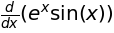

计算后


In [15]:
s = Derivative(sin(x)*exp(x),x)

eval_comparator(s)

## 求积分

计算$\int(e^x\sin{(x)} + e^x\cos{(x)})\,dx$

计算前：


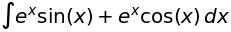

计算后


In [16]:
s = Integral(exp(x)*sin(x) + exp(x)*cos(x))

eval_comparator(s)

计算$\int_{-\infty}^\infty \sin{(x^2)}\,dx$

计算前：


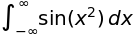

计算后


In [17]:
s = Integral(sin(x**2),(x,-oo,oo))

eval_comparator(s)

计算$\lim_{x\to 0}\frac{\sin{(x)}}{x}$

## 求极限

计算前：


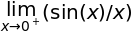

计算后


In [18]:
s = Limit(sin(x)/x, x, 0)

eval_comparator(s)

求解 $x^2 - 2 = 0$

## 求解等式

In [19]:
s = Eq(x**2 - 2, 0)

func_comparator(s, solve, x)

应用函数solve()前：


使用后:


## 求微分方程

计算微分方程$y'' - y = e^t$

应用函数dsolve()前：


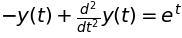

使用后:


In [20]:
y = Function('y')

s = Eq(y(t).diff(t, t) - y(t), exp(t))

func_comparator(s, dsolve, y(t))

## 矩阵计算

计算$\left[\begin{smallmatrix}1 & 2\\2 &
2\end{smallmatrix}\right]$的engenvalue

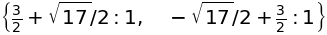

In [21]:
Matrix([[1, 2], [2, 2]]).eigenvals()

用spherical Bessel function jν(z)改写Bessel function Jν(z)

## 作图

画函数图像

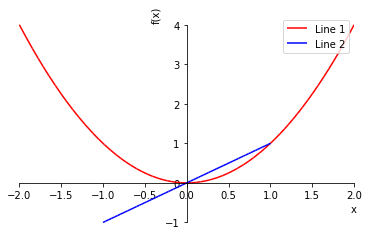

In [22]:
expr_1 = x**2
range_1 = (x,-2,2)

expr_2 = x
range_2 = (x,-1,1)

p = plot(
    (expr_1,range_1),
    (expr_2,range_2),
    show = False,
    legend = True
);

p[0].line_color = 'r'
p[1].line_color = 'b'

p[0].label = 'Line 1'
p[1].label = 'Line 2'

p.show()

画3D平面

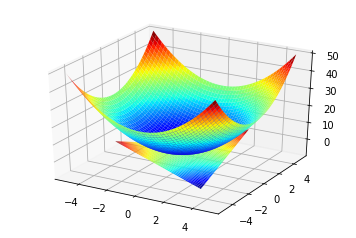

In [23]:
from sympy.plotting import plot3d

x,y = symbols('x y')

plot3d(
    (x**2 + y**2, (x, -5, 5), (y, -5, 5)),
    (x*y, (x, -3, 3), (y, -3, 3))
);

## 定义符号

## 定义变量符号

可以用symbols()去一次性定义多个符号变量。将想要的符号用空格隔开，以字符串的方式传入函数。

In [24]:
from sympy import symbols

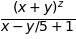

In [25]:
x,y,z = symbols('x y z')

expr = (x+y)**z/(x+1-y/5)

expr

除了用字母，也可以用单词作为符号名称。

In [26]:
speed,time = symbols('speed time')
display(speed, time)

有些字符串是保留字，用于定义诸如$\lambda, \nu$等特殊的符号。

In [27]:
lamda, n = symbols('lamda nu')

display(lamda, n)

Python变量名不一定要和符号名保持一致。

In [28]:
y, x = symbols('x y')

display(x, y)

但是为了避免一些不必要的混乱，建议还是让Python变量名和符号名保持一致比较好。

## 定义函数符号

传入```cls = Function```定义函数符号。

In [29]:
f, g = symbols('f g', cls=Function)

display(f(x))

display(g(x,y))

## 定义数字

可以使用Integer, Float, Rational去定义Sympy中的整数，浮点数和有理数。

In [30]:
from sympy import Integer, Float, Rational

In [31]:
i = Integer(1)

i

In [32]:
f = Float(2.31)

f

In [33]:
r = Rational(2,7)

r

# 定义表达式
## 基本表达式

基本的数学表达式用符号变量和python的运算符就够构造。

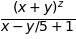

In [34]:
x,y,z = symbols('x y z')

expr = (x+y)**z/(x+1-y/5)

expr

当Python的objects和Sympy的objects相遇的时候，Python objects会被自动转化成Sympy objects.所以大部分使用我们直接使用python内置的数。

但是,遇到两个python数值相除的时候，Python会先完成除法运算，将有理数转变成浮点数。

In [35]:
expr = x+1/2

expr

所以如果我们需要使用有理数，需要显示的去进行定义。

In [36]:
expr = x+Rational(1,2)

expr

更复杂的表达式例如微积分需要借助Sympy的函数来实现。这部分内容会在后面的教程中介绍。

## 定义等式
可以用```Eq```来定义等式。

In [37]:
x,y = symbols('x,y')

eq = Eq(x**2-x,0)

print('等式n:')
display(eq)

等式n:


# 处理表达式

## 多项/有理函数

### simplify()
Sympy提供了多种函数用于表达式的化简。simplify()是一个通用的函数，它尝试“智能”的应用所有这些函数，让表达式达到一个“最简化”的状态。

下面是一些例子。

In [38]:
expr = sin(x)**2 + cos(x)**2
func_comparator(expr, simplify)

应用函数simplify()前：


使用后:


应用函数simplify()前：


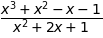

使用后:


In [39]:
expr = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)

func_comparator(expr, simplify)

应用函数simplify()前：


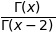

使用后:


In [40]:
expr = gamma(x)/gamma(x - 2)

func_comparator(expr, simplify)

由于很难定义什么是"最简化"，所以你可能得不到你想要的结果。

In [41]:
expr = x**2 + 2*x + 1

func_comparator(expr, simplify)

应用函数simplify()前：


使用后:


在上面的例子里。你可能觉得$(x+1)^2$是最简化的结果但是simplify并不同意。 这种时候，我们就要使用更加具体的化简函数去更好的控制结果。这些函数后面会介绍。

除此之外，由于simplify()需要把各种各样的化简都尝试一下才能决定哪种方案最好，处理速度会慢。所以如果你已经知道自己想要哪种类型的化简，直接使用特定的函数就好。

### expand()
如果传入一个多项式， expand()会把它处理成由单项式的和构成的标准型。

In [42]:
from sympy import expand

expr = (x + 1)**2

func_comparator(expr,expand)

应用函数expand()前：


使用后:


In [43]:
expr = (x + 1)*(x - 2) - (x - 1)*x
func_comparator(expr,expand)

应用函数expand()前：


使用后:


### factor()
factor()将表达式在有理数范围内分解成不可约的因子项。

In [44]:
from sympy import factor

expr = (x**2)*z + 4*x*y*z + 4*y**2*z

func_comparator(expr, factor)

应用函数factor()前：


使用后:


### factor_list()
factor_list()做和factor()一样的工作,但是返回的结果不可约因子项组成的list。

In [45]:
from sympy import factor_list

expr = x**2*z + 4*x*y*z + 4*y**2*z

func_comparator(expr, factor_list)

应用函数factor_list()前：


使用后:


### collect()
collect()对表达式进行同类项合并。

In [46]:
from sympy import collect

expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3

func_comparator(expr, collect, x)

应用函数collect()前：


使用后:


### cancel()
cancel()接受有理函数，然后处理成$p/q$的标准型。做到

* $p$和$q$是展开的多项式，没有未合并的同类项。
* $p$和$q$的第一个系数不包含分母。

应用函数cancel()前：


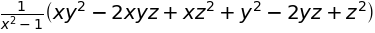

使用后:


In [47]:
from sympy import cancel

expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
                                                 
func_comparator(expr, cancel)                                                   

### apart
apart()对有理函数进行部分分式分解。它将原表达式表示成若干多项式和若干分母较简单的分式的和。

应用函数apart()前：


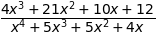

使用后:


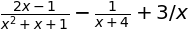

In [48]:
from sympy import apart

expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)

func_comparator(expr, apart)

## 三角函数

### trigsimp
要根据三角恒等式对三角函数进行化简的话，可以用trigsimp()。和simplify()很像，trigsimp()尝试使用各种三角恒等式去处理接受的表达式，然后根据“直觉”找到最好的选择。

In [49]:
from sympy import trigsimp

expr = sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4

func_comparator(expr, trigsimp)

应用函数trigsimp()前：


使用后:


trigsimp()也能用在双曲函数上。

In [50]:
expr = cosh(x)**2 + sinh(x)**2

func_comparator(expr, trigsimp)

应用函数trigsimp()前：


使用后:


### expand_trig
如果想展开三角函数，例如，想利用和角公式和倍角公式的话，可以用expand_trig()。

In [51]:
from sympy import expand_trig

expr = sin(x + y)

func_comparator(expr,expand_trig)

应用函数expand_trig()前：


使用后:


## 幂函数

### 假设

介绍针对指数函数的化简函数之前，得先讨论一下和指数有关的几个等式。

我们有三个等式。

1. $x^ax^b = x^{a + b}$
2. $x^ay^a = (xy)^a$
3. $(x^a)^b = x^{ab}$

等式1总是成立。

等式2不总是成立。我们可以举一个针对等式2的反例。

如果$x=y=−1$ and $a=1/2$, 那么$x^ay^a = \sqrt{-1}\sqrt{-1} = i\cdot i = -1$, 可是$x^ay^a = \sqrt{-1}\sqrt{-1} = i\cdot i = -1$.

等式3也不是一直成立。例如， 如果$x=−1$, $a=2$, and $b=1/2$, 那么$(x^a)^b = {\left ((-1)^2\right )}^{1/2} = \sqrt{1} = 1$且有$x^{ab} = (-1)^{2\cdot1/2} = (-1)^1 = -1$

记得这些很重要，因为默认情况下，Sympy并不会利用并不总是成立的等式用于化简操作。

但是我们可以添加额外的假设条件，让等式2和等式3在这些假设条件下做到衡成立。

一套让等式2满足的条件是，$x, y \geq 0$ and $a \in \mathbb{R};一套让等式3满足的条件是$b \in \mathbb{Z}$

为了让Sympy利用这些只有在特定假设下才成立的等式进行化简，我们需要给符号添加假设(默认假设是它们都是复数)。

我们后面会对假设系统进行更细致的探讨。下面先举一个简单的用法的例子。这个例子里，我们假设$x,y$值为正且$a,b$是实数。

In [52]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)

另一个强制进行化简，无视假设的方法是传入```force = True```。这个用法我们后面会遇到。

### powsimp
powsimp()会从左到右应用等式1和2.

In [53]:
from sympy import powsimp
expr = x**a*x**b
func_comparator(expr, powsimp)

应用函数powsimp()前：


使用后:


In [54]:
from sympy import powsimp
expr = x**a*y**a
func_comparator(expr, powsimp)

应用函数powsimp()前：


使用后:


如果没有相应的假设让等式2成立，化简不会发生。

In [55]:
x, y = symbols('x y')
a, b = symbols('a b')

from sympy import powsimp

expr = x**a*y**a
func_comparator(expr, powsimp)

应用函数powsimp()前：


使用后:


如果你确信希望应用化简，无论假设条件如何，可以传入```force=True```

In [56]:
x, y = symbols('x y')
a, b = symbols('a b')

from sympy import powsimp
expr = x**a*y**a
func_comparator(expr, powsimp,force=True)

应用函数powsimp()前：


使用后:


### expand_power_exp
expand_power_exp()从右往左应用等式1。

In [57]:
from sympy import expand_power_exp
expr = x**(a + b)
func_comparator(expr, expand_power_exp)

应用函数expand_power_exp()前：


使用后:


### expand_power_base
expand_power_base()从左到右应用等式2.

In [58]:
from sympy import expand_power_base
expr = (x*y)**a
func_comparator(expr, expand_power_base)

应用函数expand_power_base()前：


使用后:


### powdenest
powdenest()从左往右应用等式3。

In [59]:
from sympy import powdenest
expr = (x**a)**b
func_comparator(expr, powdenest,force=True)

应用函数powdenest()前：


使用后:


## 指数函数和对数函数

对数函数有个主要的等式。

1. $\log{(xy)} = \log{(x)} + \log{(y)}$
2. $\log{(x^n)} = n\log{(x)}$

它们有和幂函数一样的问题。为了让化简时能利用上这些等式，我们需要传入```force = True```或者添加额外的假设。

一套充分条件是

In [60]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)

### expand_log
expand_log()从左往右应用等式1和2

In [61]:
from sympy import expand_log

expr = log(x*y)

func_comparator(expr,expand_log)

应用函数expand_log()前：


使用后:


In [62]:
from sympy import expand_log

expr = log(x**n)

func_comparator(expr,expand_log)

应用函数expand_log()前：


使用后:


In [63]:
from sympy import expand_log

expr = log(x/y)

func_comparator(expr,expand_log)

应用函数expand_log()前：


使用后:


### logcombine
expand_log()从右往左应用等式1和2

In [64]:
from sympy import logcombine

expr = log(x) + log(y)

func_comparator(expr, logcombine)

应用函数logcombine()前：


使用后:


In [65]:
from sympy import logcombine

expr = n*log(x)

func_comparator(expr, logcombine)

应用函数logcombine()前：


使用后:


## 组合函数

## combsimp
要化简组合函数的话，可以用combsimp()

应用函数combsimp()前：


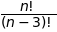

使用后:


In [66]:
from sympy import combsimp

expr = factorial(n)/factorial(n - 3)

func_comparator(expr, combsimp)

In [67]:
from sympy import combsimp, binomial

n,k = symbols('n k')

expr = binomial(n+1, k+1)/binomial(n, k)

func_comparator(expr, combsimp)

应用函数combsimp()前：


使用后:


## 参考资料

(Sympy官方文档)[http://docs.sympy.org/latest/index.html]

# 相关文章
* [Sympy笔记I]({filename}0026_sympy_intro_1_ch.ipynb)
* [Sympy笔记II]({filename}0027_sympy_intro_2_ch.ipynb)
* [Sympy笔记III]({filename}0028_sympy_intro_3_ch.ipynb)
* [Sympy笔记IV]({filename}0029_sympy_intro_4_ch.ipynb)